Task 4: Twitter Sentiment Analysis & Visualization

Sample Data:
     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


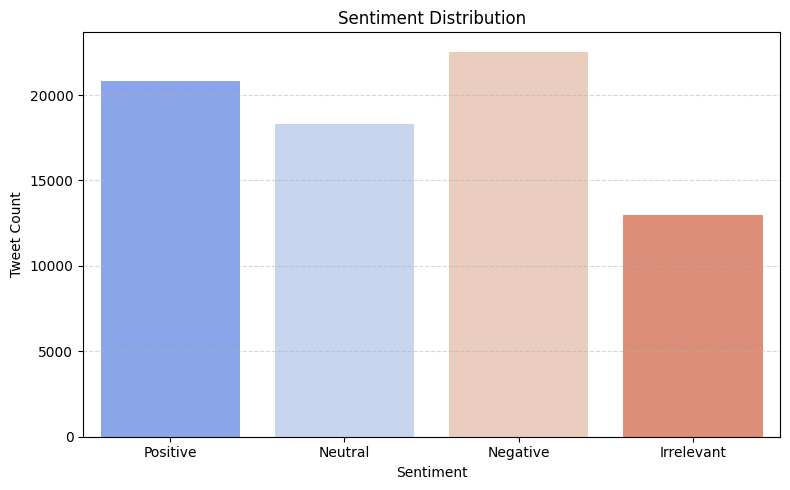

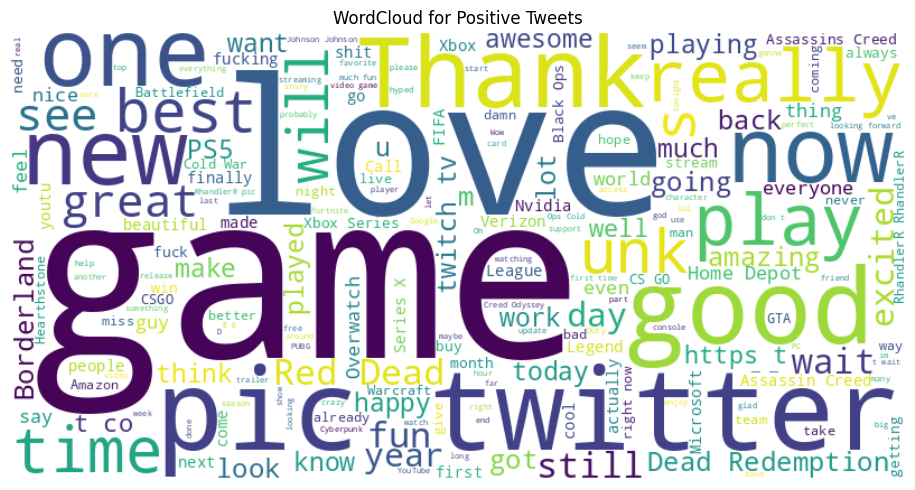

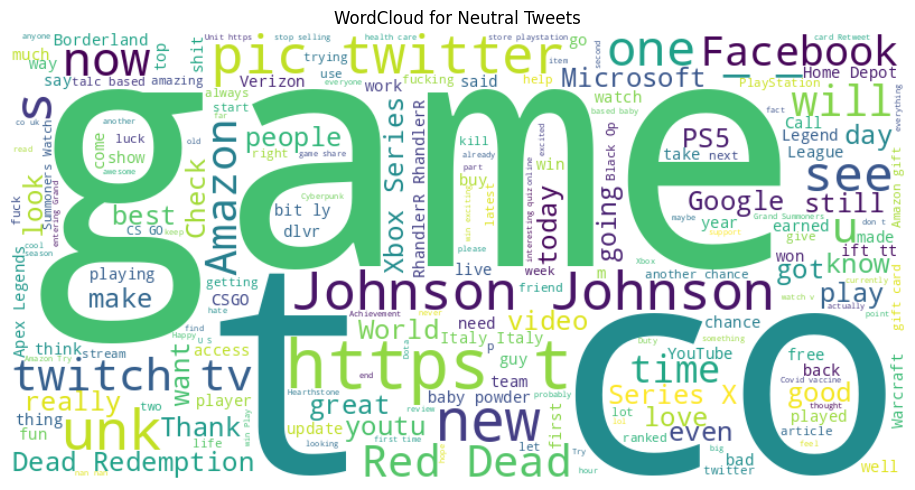

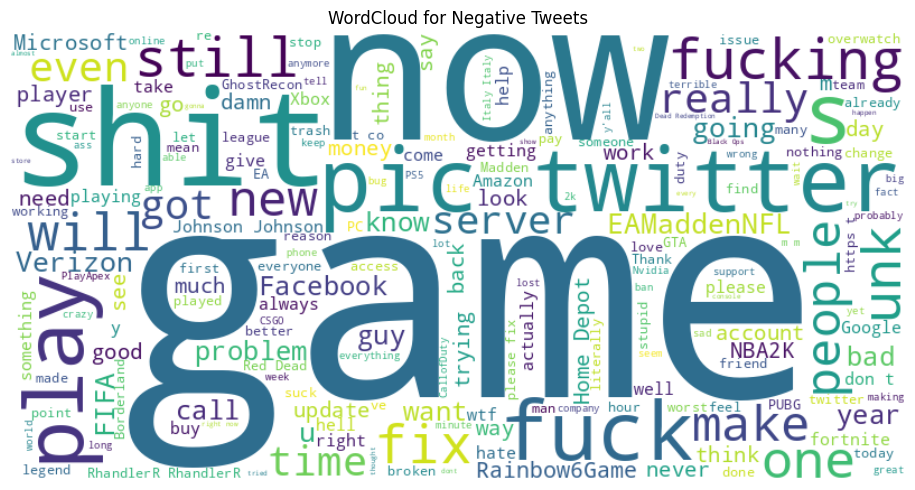

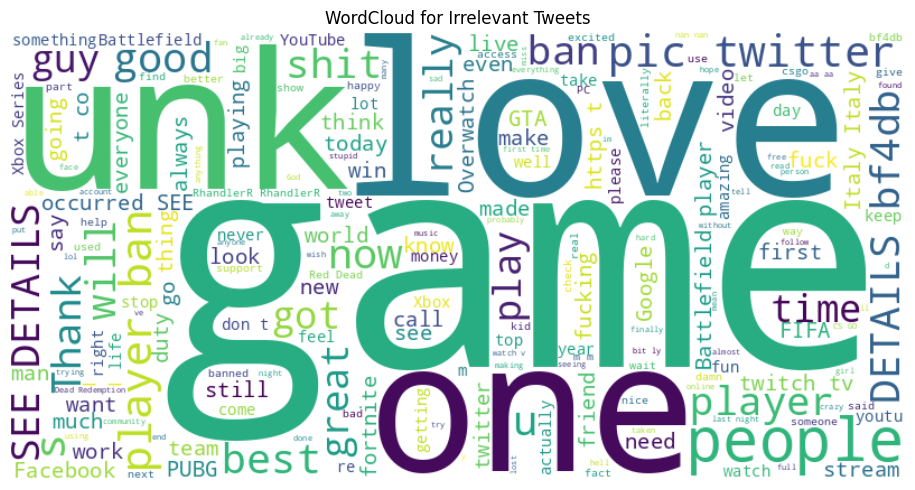

<ipython-input-2-f41d7a1cda83>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Word', y='Frequency', palette=colors)


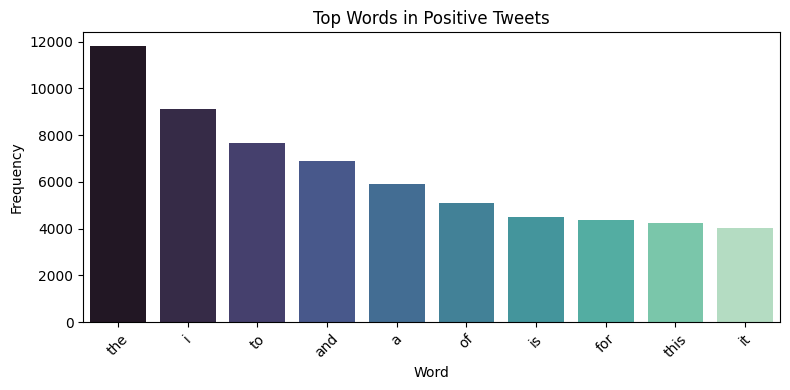

<ipython-input-2-f41d7a1cda83>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Word', y='Frequency', palette=colors)


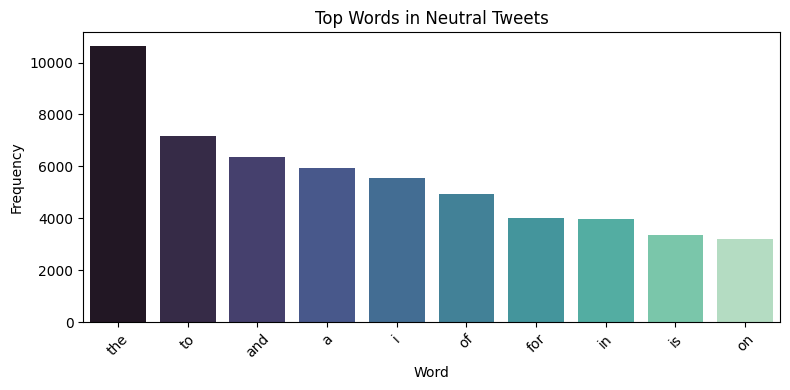

<ipython-input-2-f41d7a1cda83>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Word', y='Frequency', palette=colors)


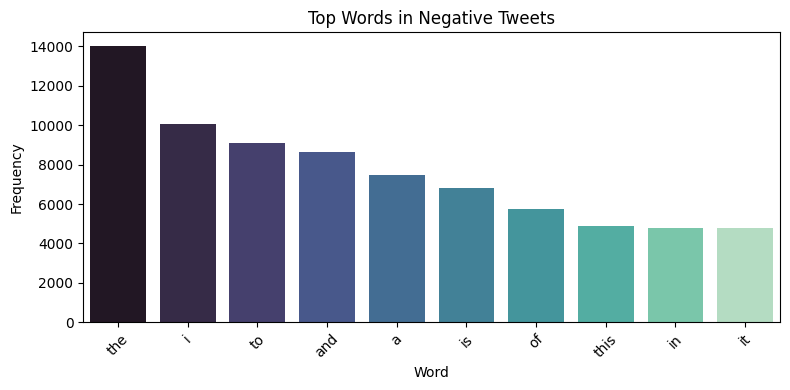

<ipython-input-2-f41d7a1cda83>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Word', y='Frequency', palette=colors)


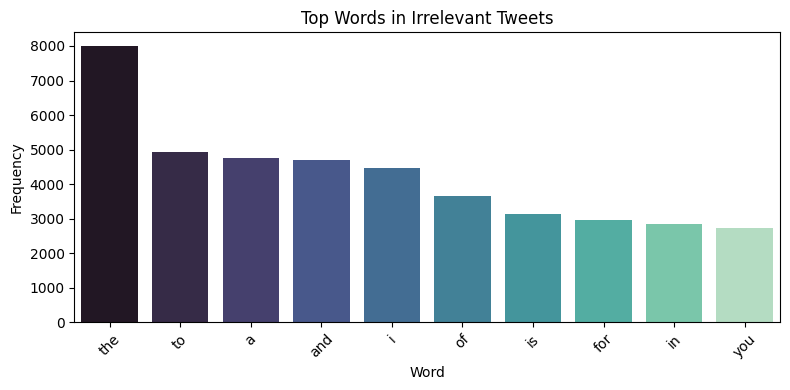

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

# Load the training dataset
df = pd.read_csv('/var/twitter_training.csv', header=None, names=['ID', 'Entity', 'Sentiment', 'Text'])

# Display the first few rows
print("Sample Data:")
print(df.head())

# Check class distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='coolwarm', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Function to generate WordClouds
def generate_wordcloud(sentiment_label):
    text = " ".join(df[df['Sentiment'] == sentiment_label]['Text'].astype(str))
    wordcloud = WordCloud(
        width=800, height=400,
        stopwords=STOPWORDS,
        background_color='white',
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment_label} Tweets")
    plt.tight_layout()
    plt.show()

# Generate word clouds for each sentiment
for sentiment in df['Sentiment'].unique():
    generate_wordcloud(sentiment)

# Optional: Top words per sentiment (frequency analysis)
def preprocess_text(text):
    return re.sub(r'[^\w\s]', '', text.lower())

for sentiment in df['Sentiment'].unique():
    words = df[df['Sentiment'] == sentiment]['Text'].astype(str).apply(preprocess_text).str.split().sum()
    common_words = Counter(words).most_common(10)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(8,4))
    colors = sns.color_palette('mako', len(words_df))
    sns.barplot(data=words_df, x='Word', y='Frequency', palette=colors)
    plt.title(f"Top Words in {sentiment} Tweets")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
